# Welcome!
## Pay attention to the headings and comments

In [6]:
# https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/
# Load the environment file where paths to data are stored.
from dotenv import load_dotenv
from pathlib import Path  # Python 3.6+ only
import os
import pandas as pd
import spacy
import numpy as np
pd.set_option('display.max_colwidth', None)
env_path = '/data/dssg-disinfo/.env'
load_dotenv(env_path, override=True)
# settings.py
PATH = os.getenv("PATH")
COLUMN = 'article_pk'
CLEAN_DATA = os.getenv("CLEAN_DATA")
# Read in the data
df = pd.read_csv(os.path.join(PATH,CLEAN_DATA))

In [11]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn import metrics
import string
from spacy.lang.en import English

## Logistic Regression with Word Embeddings

In [3]:
# Do this in the terminal- python -m spacy download en_vectors_web_lg
nlp = spacy.load('en_vectors_web_lg')

# this is the step that creates the word embeddings
X = np.asarray([nlp(article).vector for article in df.article_text])
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

Logistic Regression Accuracy: 0.9076576576576577
Logistic Regression Precision: 0.8753191489361702
Logistic Regression Recall: 0.85
roc_auc_score for Logistic Regression:  0.9665137517555807


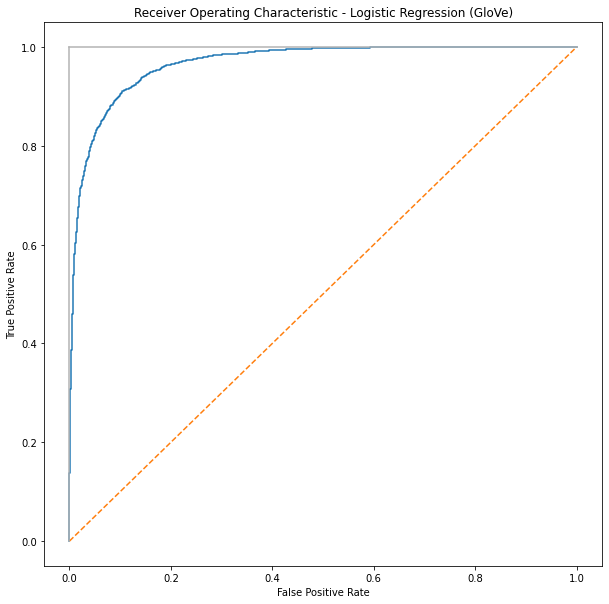

<Figure size 432x288 with 0 Axes>

In [13]:
# Logistic Regression Classifier

# Initiating the model
lr = LogisticRegression(max_iter = 200)

# model generation
lr.fit(X_train,y_train)

# Predicting with a test dataset
predicted = lr.predict(X_test)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

# Get predicted probabilities
y_score = lr.predict_proba(X_test)[:,1]

# Plot Receiving Operating Characteristic Curve
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)

print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score))

# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression (GloVe)')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Tokenizer

In [8]:
# this is the customized tokenizer for Vectorizer function

# Create our list of punctuation marks
punctuations = string.punctuation
# Create our list of stopwords
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)
    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lower_ for word in mytokens]
    mytokens = [word for word in mytokens if word not in punctuations]
    # return preprocessed list of tokens
    return mytokens

# Tokenizer for removing stopwords
def spacy_tokenizer_remove_stopwords(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)
    # Removing stop words
    mytokens = [ word.lower_ for word in mytokens]
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]
    # return preprocessed list of tokens
    return mytokens

## Logistic Regression with Count Vectorizer

/home/richa/.conda/envs/dssg/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression Accuracy: 0.9653716216216216
Logistic Regression Precision: 0.9571068124474348
Logistic Regression Recall: 0.9404958677685951
roc_auc_score for Logistic Regression:  0.9893932042260976


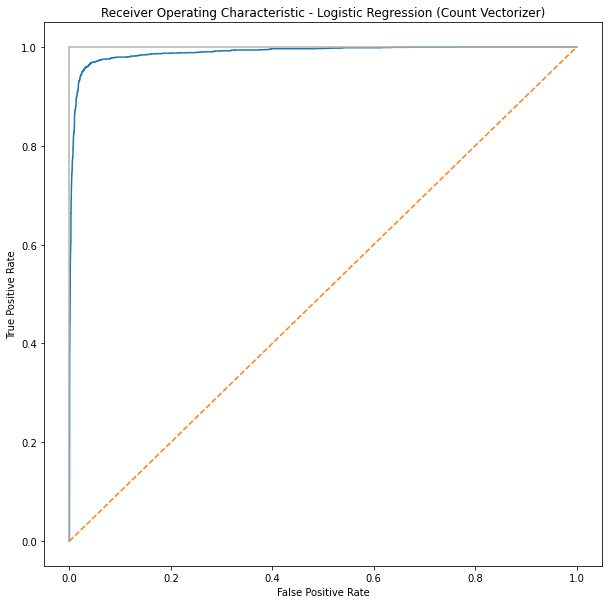

In [9]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df.article_text, df.label, random_state = 42)

# Create pipeline using Bag of Words
pipe = Pipeline([('vectorizer', CountVectorizer(tokenizer=spacy_tokenizer,ngram_range=(1,1))),
                 ('classifier', LogisticRegression(max_iter = 200)
)])

# model generation
pipe.fit(X_train1,y_train1)

# Predicting with a test dataset
predicted1 = pipe.predict(X_test1)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test1, predicted1))
print("Logistic Regression Precision:",metrics.precision_score(y_test1, predicted1))
print("Logistic Regression Recall:",metrics.recall_score(y_test1, predicted1))

# Get predicted probabilities
y_score1 = pipe.predict_proba(X_test1)[:,1]

# Plot Receiving Operating Characteristic Curve
# Create true and false positive rates
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test1, y_score1)

print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test1, y_score1))

# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression (Count Vectorizer)')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Logistic Regression Count Vectorizer 
Removing Stopwords

/home/richa/.conda/envs/dssg/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression Accuracy: 0.9634009009009009
Logistic Regression Precision: 0.9534005037783375
Logistic Regression Recall: 0.9384297520661157
roc_auc_score for Logistic Regression:  0.9886627414585261


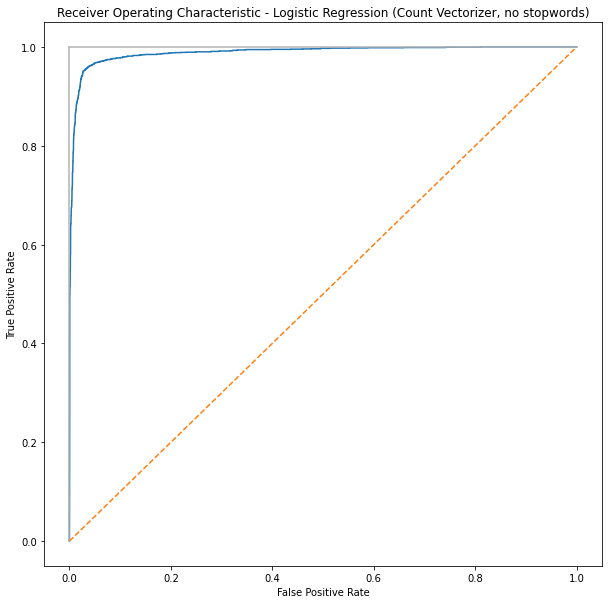

In [12]:
tfidf = TfidfVectorizer(tokenizer=spacy_tokenizer,ngram_range=(1,1))

# Create pipeline using Bag of Words
pipe = Pipeline([('vectorizer', CountVectorizer(tokenizer=spacy_tokenizer_remove_stopwords,ngram_range=(1,1))),
                 ('classifier', LogisticRegression(max_iter = 200)
)])

# model generation
pipe.fit(X_train1,y_train1)

# Predicting with a test dataset
predicted1 = pipe.predict(X_test1)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test1, predicted1))
print("Logistic Regression Precision:",metrics.precision_score(y_test1, predicted1))
print("Logistic Regression Recall:",metrics.recall_score(y_test1, predicted1))

# Get predicted probabilities
y_score1 = pipe.predict_proba(X_test1)[:,1]

# Plot Receiving Operating Characteristic Curve
# Create true and false positive rates
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test1, y_score1)

print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test1, y_score1))

# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression (Count Vectorizer, no stopwords)')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Logistic Regression with TfIdf

Logistic Regression Accuracy: 0.954954954954955
Logistic Regression Precision: 0.9545454545454546
Logistic Regression Recall: 0.9111570247933884
roc_auc_score for Logistic Regression:  0.990806138004531


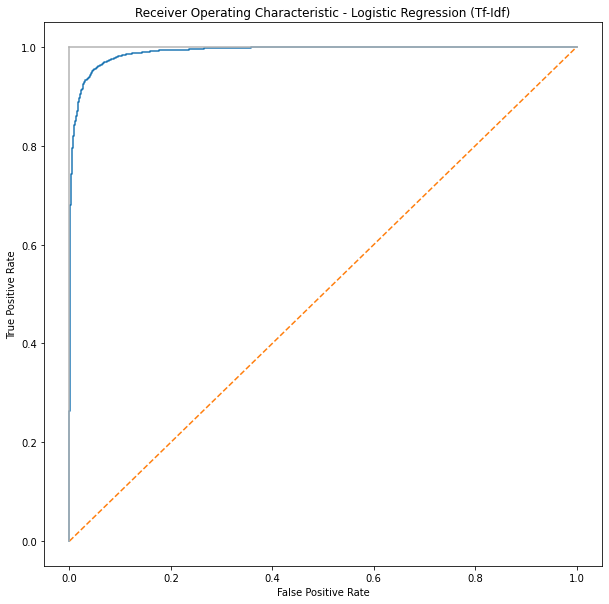

In [13]:
# Create pipeline using Bag of Words
pipe_tfidf = Pipeline([('vectorizer', TfidfVectorizer(tokenizer=spacy_tokenizer,ngram_range=(1,1))),
                 ('classifier', LogisticRegression(max_iter = 200)
)])

# model generation
pipe_tfidf.fit(X_train1,y_train1)

# Predicting with a test dataset
predicted2 = pipe_tfidf.predict(X_test1)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test1, predicted2))
print("Logistic Regression Precision:",metrics.precision_score(y_test1, predicted2))
print("Logistic Regression Recall:",metrics.recall_score(y_test1, predicted2))

# Get predicted probabilities
y_score2 = pipe_tfidf.predict_proba(X_test1)[:,1]

# Plot Receiving Operating Characteristic Curve
# Create true and false positive rates
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test1, y_score2)

print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test1, y_score2))

# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression (Tf-Idf)')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Logistic Regression- TfIdf
removing stopwords

Logistic Regression Accuracy: 0.9552364864864865
Logistic Regression Precision: 0.9510729613733906
Logistic Regression Recall: 0.915702479338843
roc_auc_score for Logistic Regression:  0.9904036777212385


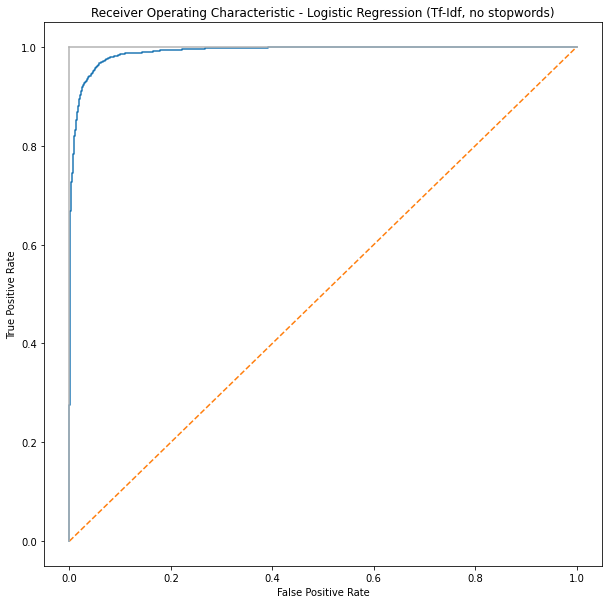

In [31]:
# Create pipeline using Bag of Words
pipe_tfidf = Pipeline([('vectorizer', TfidfVectorizer(tokenizer=spacy_tokenizer_remove_stopwords,ngram_range=(1,1))),
                 ('classifier', LogisticRegression(max_iter = 200)
)])

# model generation
pipe_tfidf.fit(X_train1,y_train1)

# Predicting with a test dataset
predicted2 = pipe_tfidf.predict(X_test1)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test1, predicted2))
print("Logistic Regression Precision:",metrics.precision_score(y_test1, predicted2))
print("Logistic Regression Recall:",metrics.recall_score(y_test1, predicted2))

# Get predicted probabilities
y_score2 = pipe_tfidf.predict_proba(X_test1)[:,1]

# Plot Receiving Operating Characteristic Curve
# Create true and false positive rates
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test1, y_score2)

print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test1, y_score2))

# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression (Tf-Idf, no stopwords)')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Visualising vectors
This is connected to visualising word vector stuff!

In [4]:
def display_closestwords_tsnescatterplot(model, word, size):
    arr = np.empty((0,200), dtype='f') 
    word_labels = [word]

    close_words = model.similar_by_word(word)
    arr = np.append(arr, np.array([model[word]]), axis=0)
    
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)

        tsne = TSNE(n_components=2, random_state=0)
        np.set_printoptions(suppress=True)
        Y = tsne.fit_transform(arr)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

word = "virus"
#model = Word2Vec(tokenized_list, min_count=10,size= 200,workers=3, window =3, sg = 1)
#model = np.asarray([nlp(article).vector for article in df.article_text])
model = X
display_closestwords_tsnescatterplot(model, word, 100)

AttributeError: 'numpy.ndarray' object has no attribute 'similar_by_word'

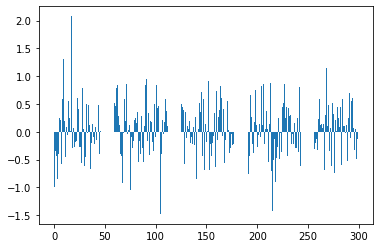

In [11]:
nlp('virus').vector
import matplotlib.pyplot as plt
plt.bar(range(300), nlp('virus').vector)
plt.show()

In [59]:
def scatter_plot(distances, indices):
    x_coords = np.squeeze(indices)
    y_coords = np.squeeze(distances)
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(np.squeeze(indices), x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.title('10 most similar articles to the Article')
    plt.ylabel('Distance (minkowski)')
    plt.xlabel('Article index')
    plt.show()

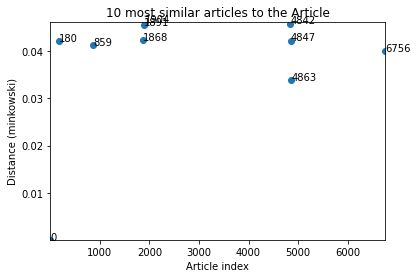

In [61]:
from sklearn.neighbors import NearestNeighbors
NUMBER_OF_NEIGHBORS = 10
nn = NearestNeighbors(n_neighbors=NUMBER_OF_NEIGHBORS)
nn.fit(X)
distances, indices = nn.kneighbors([X[0]])
scatter_plot(distances, indices)
#np.squeeze(distances).shape

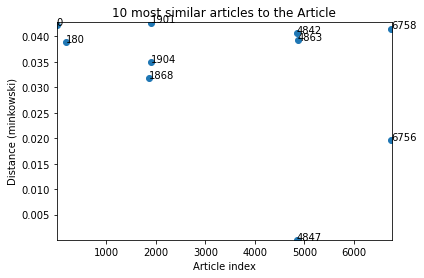

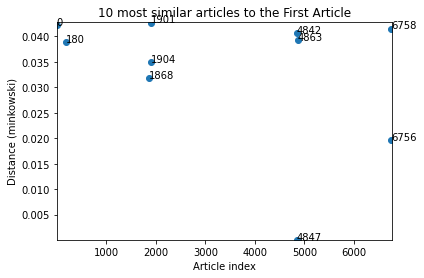

In [56]:
distances, indices = nn.kneighbors([X[4847]])
scatter_plot(distances, indices)

In [48]:
np.take(df.article_text, np.squeeze(indices))

0                                                                                                                                                                          MAD AS HELL EMBD_HTML Search Search for: COMMUNIST PROPAGANDA/PRISON TRAINING , CORONA VIRUS HOAX/BILL GATES/ANTHONY FAUCI , CRIMINALS IN GOVERNMENT , FAKE NEWS/CNN/MSNBC/FOX/CBS/NBC/GOVERNMENT PSYOPS , GEORGE SOROS/THE FORD FOUNDATION CRIMINAL ACTIVITY , GOOGLE SPYING AND CENSORSHIP/POLICE STATE WOW! GOOGLE ANY NUMBER + CASES AND YOULL GET A RESULT! Video June 23, 2020 HOWARDBEALE THE ALEX JONES SHOW LIVE STREAM 12-4 MONDAY THREW FRIDAY/SUNDAY 5-7 DAVID KNIGHT LIVE STREAM FEED NEW SHOW 10 AM-12AM WAR ROOM LIVE STREAM 4-6 MONDAY- FRIDAY NWO CARD EMBD_HTML A GAME OF WORLD DOMINATION ON THE ETHEREUM BLOCK CHAIN EMBD_HTML HIGH LEVEL PEDOPHILES IN THE GOVERNMENT EXPOSED Q is for the Queens Qinetiq  Coronavirus Patent (Mirror) THE DEEP STATE FULLY EXPOSED THIS IS WHAT FORCED VACCINATIONS AND MARTIAL LAW WILL LOOK LIKE THE 

In [ ]:
from numpy import dot
from numpy.linalg import norm

cos_sim = dot(doc.vector, doc1.vector)/(norm(doc.vector)*norm(doc1.vector))
cos_sim

glove_comments = np.asarray(doc.vector)
glove_comments.shape
nlp.add_pipe(nlp.create_pipe("sentencizer"))
text = """When learning data science, you shouldn't get discouraged!
Challenges and setbacks aren't failures, they're just part of the journey. You've got this!"""
doc2 = nlp(text)
# create list of sentence tokens
sents_list = []
for sent in doc2.sents:
    sents_list.append(sent.text)
print(sents_list)

def get_embeddings(vocab):
    return vocab.vectors.data